Coefficients: [[ 0.          0.88288132 -2.00773206  0.50248987]]
Intercept: [-2.4720509]
Root Mean Square Error: 2.784355319406837
R^2 Score: 0.9958727510236035


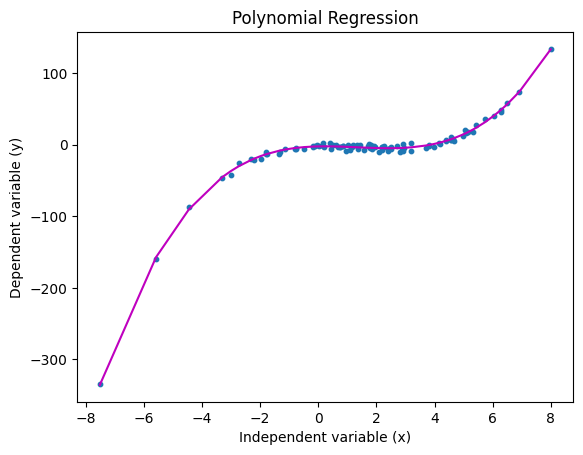

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import operator

# Generating some data based on a polynomial relationship
x = 2 - 3 * np.random.normal(0, 1, 100)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 100)

# Reshaping the data to apply the model
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Transforming the data to include another axis
degree = 3
polynomial_features = PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(x)

# Fitting the Polynomial Regression Model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Coefficients and the intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print("Root Mean Square Error:", rmse)
print("R^2 Score:", r2)

# Plotting the results
plt.scatter(x, y, s=10)
# Sorting values for a smooth line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('Polynomial Regression')
plt.xlabel('Independent variable (x)')
plt.ylabel('Dependent variable (y)')
plt.show()
